In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [1]:
%matplotlib notebook

In [2]:
os.listdir('../Metadata/')

['ALLCRFS.pdf', 'form101.h5', 'Table3.csv', 'Table4.csv', 'videoID.csv']

In [3]:
scores = pd.read_csv('../Metadata/Table4.csv')
scores.query('Visit != "1 Month"', inplace=True) #remove 1M scores (no videos)

In [4]:
scores.head()

,SubjID,Visit,Task,TaskAbb,Start Timestamp (UTC),Stop Timestamp (UTC),Tremor - Left,Tremor - Right,Bradykinesia - Left,Bradykinesia - Right,Dyskinesia - Left,Dyskinesia - Right,Overall,Validated,Side
0,1003,2 Weeks: Time 0,Taking a glass of water and drinking,Drnkg,52:57.1,53:32.8,1.0,1.0,1.0,1.0,0.0,0.0,1.0,True,Left
1,1003,2 Weeks: Time 0,Drawing on a paper,Drwg,47:43.9,47:59.8,1.0,0.0,0.0,2.0,0.0,0.0,1.0,True,Left
2,1003,2 Weeks: Time 0,Folding towels,Fldg,56:49.2,57:38.6,1.0,1.0,1.0,1.0,0.0,0.0,1.0,True,Left
3,1003,2 Weeks: Time 0,Finger to nose--left hand,FtnL,41:52.7,42:22.3,1.0,0.0,1.0,NaN,0.0,0.0,1.0,True,Left
4,1003,2 Weeks: Time 0,Finger to nose--right hand,FtnR,41:11.9,41:43.8,0.0,1.0,NaN,1.0,0.0,0.0,1.0,True,Left


In [7]:
cols=scores.columns

In [8]:
cols[6]

'Tremor - Left'

In [9]:
scores.TaskAbb.unique()

array(['Drnkg', 'Drwg', 'Fldg', 'FtnL', 'FtnR', 'NtsBts', 'RamL', 'RamR',
       'Sheets', 'Sitng', 'SitStand', 'Stndg', 'Typg', 'Wlkg', 'WlkgCnt'],
      dtype=object)

In [10]:
tasks = ['FtnL', 'FtnR', 'RamL', 'RamR', 'Sitng', 'SitStand', 'Stndg', 'WlkgCnt']

In [11]:
len(scores.SubjID.unique())

29

In [12]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2610 entries, 0 to 2954
Data columns (total 15 columns):
SubjID                   2610 non-null int64
Visit                    2610 non-null object
Task                     2610 non-null object
TaskAbb                  2610 non-null object
Start Timestamp (UTC)    2445 non-null object
Stop Timestamp (UTC)     2445 non-null object
Tremor - Left            2486 non-null float64
Tremor - Right           2483 non-null float64
Bradykinesia - Left      1657 non-null float64
Bradykinesia - Right     1657 non-null float64
Dyskinesia - Left        2487 non-null float64
Dyskinesia - Right       2484 non-null float64
Overall                  2318 non-null float64
Validated                2610 non-null bool
Side                     2490 non-null object
dtypes: bool(1), float64(7), int64(1), object(6)
memory usage: 308.4+ KB


### Subjects with high scores 

In [13]:
print('High Tremor ',scores.loc[(scores.TaskAbb.isin(tasks)) & ((scores['Tremor - Left']== 3) | (scores['Tremor - Right']== 3)), 'SubjID'].unique())
print('High Bradykinesia',scores.loc[(scores.TaskAbb.isin(tasks)) & ((scores['Bradykinesia - Left']== 3) | (scores['Bradykinesia - Right']== 3)), 'SubjID'].unique())
print('High Dyskinesia',scores.loc[(scores.TaskAbb.isin(tasks)) & ((scores['Dyskinesia - Left']== 3) | (scores['Dyskinesia - Right']== 3)), 'SubjID'].unique())
ht = scores.loc[(scores.TaskAbb.isin(tasks)) & ((scores['Tremor - Left']== 3) | (scores['Tremor - Right']== 3)), 'SubjID'].unique()
hb = scores.loc[(scores.TaskAbb.isin(tasks)) & ((scores['Bradykinesia - Left']== 3) | (scores['Bradykinesia - Right']== 3)), 'SubjID'].unique()

High Tremor  [1009 1038 1048 1049 1050 1055 1056]
High Bradykinesia [1003 1005 1039 1043 1048 1052 1054 1056]
High Dyskinesia [1024 1052]


In [14]:
scores.query('Visit != "1 Month"', inplace=True)
scores['Visit']=scores.Visit.apply(lambda x: x.split()[-1])

In [17]:
scores.loc[(scores.SubjID == s) & (scores.TaskAbb=='RamL'),['SubjID','Bradykinesia - Left','Visit']].set_index('SubjID')

,Bradykinesia - Left,Visit
SubjID,,
1056,2.008083,0
1056,3.008083,30
1056,3.008083,60
1056,3.008083,90
1056,1.008083,120
1056,2.008083,150


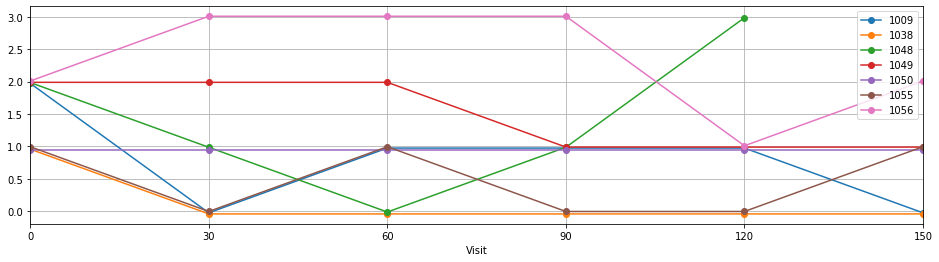

In [16]:
plt.figure(figsize=(16,4))
ax = plt.gca()
for s in ht:
    scores.loc[(scores.SubjID==s) & (scores.TaskAbb=='RamL'),'Bradykinesia - Left']+= .05*np.random.randn(1) #add jitter
    scores.loc[(scores.SubjID == s) & (scores.TaskAbb=='RamL'),['SubjID','Bradykinesia - Left','Visit']].set_index('SubjID').plot(x='Visit',y='Bradykinesia - Left',
                                                                                                                                      ax=ax, style='-o', grid=True)
ax.legend(ht)

In [18]:
print('No Tremor ',scores.loc[(scores.TaskAbb.isin(tasks)) & ((scores['Tremor - Left']== 0) & (scores['Tremor - Right']== 0)), 'SubjID'].unique())
print('No Bradykinesia',scores.loc[(scores.TaskAbb.isin(tasks)) & ((scores['Bradykinesia - Left']== 0) & (scores['Bradykinesia - Right']== 0)), 'SubjID'].unique())
print('No Dyskinesia',scores.loc[(scores.TaskAbb.isin(tasks)) & ((scores['Dyskinesia - Left']== 0) & (scores['Dyskinesia - Right']== 0)), 'SubjID'].unique())

No Tremor  [1003 1004 1005 1007 1009 1016 1018 1019 1023 1024 1029 1030 1032 1038
 1039 1043 1044 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056]
No Bradykinesia [1003 1004 1009 1023 1024 1043 1047 1048 1051 1052 1053 1054 1055 1056]
No Dyskinesia [1003 1004 1005 1007 1009 1016 1018 1019 1023 1024 1029 1030 1032 1038
 1039 1043 1044 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056]


## Fluctuators score ranges


In [19]:
#find fluctuators
form = pd.read_hdf('../Metadata/form101.h5')

In [20]:
form.head()

,SubjectCode,SiteID,VisitNm,Q11,Q12,ConsentDate,Age,Q03,Q04,Q05,Q06,Q07,Q08,Q09,Q10
0,1000.0,1313.0,Baseline,A1784,10.3.2,2017-06-15,63.0,Yes,Yes,Yes,Yes,Yes,Yes,No,No
1,1001.0,1313.0,Baseline,A1778,10.3.2,2017-06-15,64.0,No,Yes,Yes,Yes,Yes,Yes,No,No
2,1002.0,1313.0,Baseline,A1586,10.3.2,2017-06-16,51.0,No,Yes,Yes,Yes,Yes,Yes,No,No
3,1003.0,1313.0,Baseline,A1522,10.3.2,2017-06-19,60.0,Yes,Yes,Yes,Yes,Yes,Yes,No,No
4,1004.0,1332.0,Baseline,A1660,10.3.2,2017-06-21,52.0,Yes,Yes,Yes,Yes,Yes,Yes,No,No


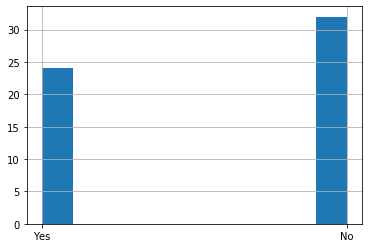

In [21]:
form.Q03.hist()

In [22]:
fluctuators = form.loc[form.Q03 == 'Yes'].SubjectCode.apply(int)

In [23]:
tasks

['FtnL', 'FtnR', 'RamL', 'RamR', 'Sitng', 'SitStand', 'Stndg', 'WlkgCnt']

In [24]:
fluctuators = list(set(scores.SubjID.unique()).intersection(set(fluctuators)))
print(np.sort(fluctuators))

[1003 1004 1005 1007 1009 1023 1024 1039 1043 1044 1047 1048 1049 1050
 1052 1053 1054 1055 1056]


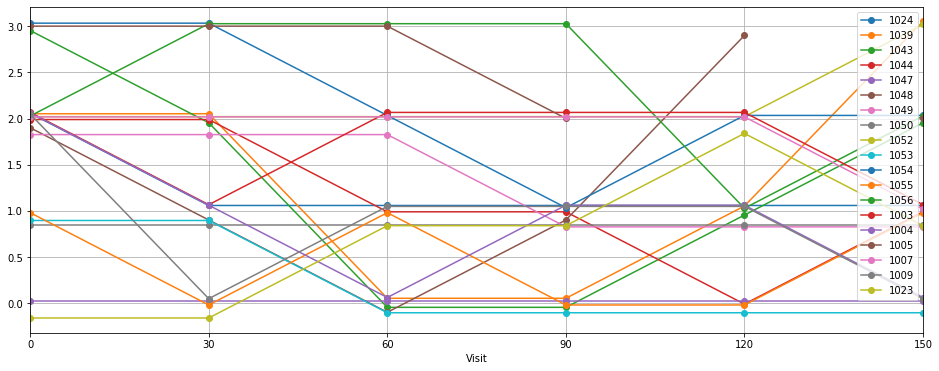

In [79]:
plt.figure(figsize=(16,6))
ax = plt.gca()
for s in fluctuators:
    scores.loc[(scores.SubjID==s) & (scores.TaskAbb=='RamL'),'Bradykinesia - Left']+= 0*np.random.randn(1) #add jitter
    scores.loc[(scores.SubjID == s) & (scores.TaskAbb=='RamL'),['SubjID','Bradykinesia - Left','Visit']].set_index('SubjID').plot(x='Visit',y='Bradykinesia - Left',
                                                                                                                                      ax=ax, style='-o', grid=True)

ax.legend(fluctuators)

In [25]:
tasks

['FtnL', 'FtnR', 'RamL', 'RamR', 'Sitng', 'SitStand', 'Stndg', 'WlkgCnt']

In [26]:
ranges = pd.DataFrame()
for t in tasks[:4]: #hand movement tasks
    if t[-1] == 'L':
        score_side = 'Bradykinesia - Left'
    else:
        score_side = 'Bradykinesia - Right'
        
    for s in fluctuators:
        ss = scores.loc[(scores.SubjID==s) & (scores.TaskAbb==t), score_side]
        data = pd.DataFrame({'SubjID':s, 'task':t, 'Range-Brady':max(ss)-min(ss)}, index=[0])
        ranges=pd.concat((ranges,data))
ranges.reset_index(drop=True, inplace=True)    

In [27]:
ranges.head()

,SubjID,task,Range-Brady
0,1024,FtnL,0.0
1,1039,FtnL,1.0
2,1043,FtnL,3.0
3,1044,FtnL,1.0
4,1047,FtnL,0.0


Text(0.5, 1.0, 'score ranges')

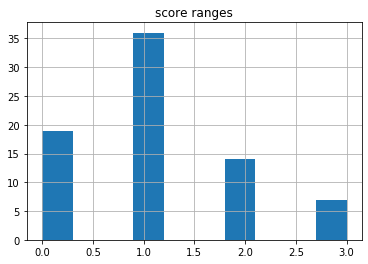

In [28]:
ranges['Range-Brady'].hist(); plt.title('score ranges')

### Fluctuators with score range = 3

In [29]:
ranges.loc[ranges['Range-Brady'] > 2]

,SubjID,task,Range-Brady
2,1043,FtnL,3.0
21,1043,FtnR,3.0
39,1039,RamL,3.0
40,1043,RamL,3.0
43,1048,RamL,3.0
59,1043,RamR,3.0
62,1048,RamR,3.0


### Fluctuators with scores range = 2

In [30]:
ranges.loc[ranges['Range-Brady'] == 2].sort_values('SubjID')

,SubjID,task,Range-Brady
52,1004,RamL,2.0
55,1009,RamL,2.0
74,1009,RamR,2.0
56,1023,RamL,2.0
75,1023,RamR,2.0
58,1039,RamR,2.0
41,1044,RamL,2.0
24,1048,FtnR,2.0
65,1052,RamR,2.0
10,1054,FtnL,2.0


In [167]:
np.sort(ranges.loc[ranges['Range-Brady'] == 2]['SubjID'].unique())

array([1004, 1009, 1023, 1039, 1044, 1048, 1052, 1054, 1056], dtype=int64)

In [31]:
scores.query('SubjID==1052 & TaskAbb=="RamR"')[['SubjID', 'Visit', 'Bradykinesia - Left',  'Bradykinesia - Right']]

,SubjID,Visit,Bradykinesia - Left,Bradykinesia - Right
2512,1052,0,NaN,2.0
2527,1052,30,NaN,1.0
2542,1052,60,NaN,1.0
2557,1052,90,NaN,0.0
2572,1052,120,NaN,1.0
2587,1052,150,NaN,1.0


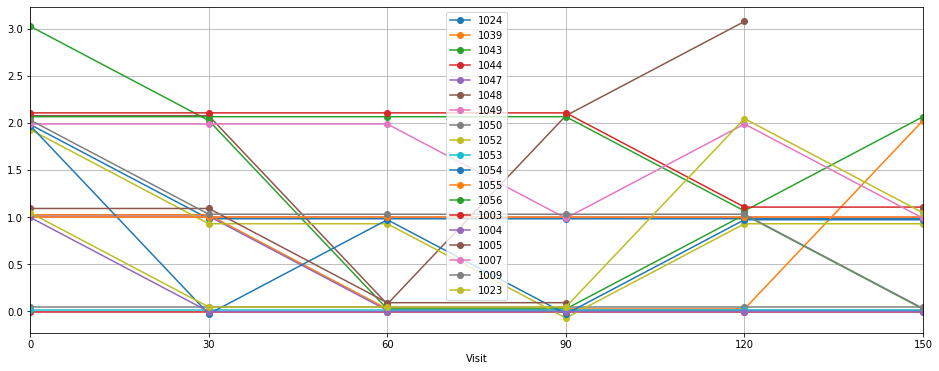

In [82]:
plt.figure(figsize=(16,6))
ax = plt.gca()
for s in fluctuators:
    scores.loc[(scores.SubjID==s) & (scores.TaskAbb=='RamR'),'Bradykinesia - Right']+= 0.05*np.random.randn(1) #add jitter
    scores.loc[(scores.SubjID == s) & (scores.TaskAbb=='RamR'),['SubjID','Bradykinesia - Right','Visit']].set_index('SubjID').plot(x='Visit',y='Bradykinesia - Right',
                                                                                                                                      ax=ax, style='-o', grid=True)

ax.legend(fluctuators)

In [87]:
df = pd.DataFrame()
t = 'RamL'
for s in fluctuators:
    smax = scores.loc[(scores.SubjID==s) & (scores.TaskAbb == t),'Bradykinesia - Left'].max()
    smin = scores.loc[(scores.SubjID==s) & (scores.TaskAbb == t),'Bradykinesia - Left'].min()
    
    


,SubjID,Visit,Task,TaskAbb,Start Timestamp (UTC),Stop Timestamp (UTC),Tremor - Left,Tremor - Right,Bradykinesia - Left,Bradykinesia - Right,Dyskinesia - Left,Dyskinesia - Right,Overall,Validated,Side
3,1003,0,Finger to nose--left hand,FtnL,41:52.7,42:22.3,1.0,0.0,1.000000,NaN,0.0,0.0,1.0,True,Left
4,1003,0,Finger to nose--right hand,FtnR,41:11.9,41:43.8,0.0,1.0,NaN,1.00000,0.0,0.0,1.0,True,Left
6,1003,0,Alternating left hand movements,RamL,43:36.5,43:53.6,0.0,0.0,2.066443,NaN,0.0,0.0,2.0,True,Left
7,1003,0,Alternating right hand movements,RamR,43:05.6,43:25.8,0.0,0.0,NaN,2.10562,0.0,0.0,2.0,True,Left
9,1003,0,Sitting,Sitng,58:07.8,58:44.3,1.0,1.0,NaN,NaN,0.0,0.0,NaN,True,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,1056,150,Alternating right hand movements,RamR,3/8/2018 22:17,3/8/2018 22:17,0.0,0.0,NaN,2.06493,2.0,1.0,2.0,False,Left
2949,1056,150,Sitting,Sitng,3/8/2018 22:24,3/8/2018 22:25,0.0,0.0,NaN,NaN,2.0,1.0,NaN,False,Left
2950,1056,150,Sit to stand,SitStand,3/8/2018 22:18,3/8/2018 22:18,0.0,0.0,NaN,NaN,2.0,2.0,0.0,False,Left
2951,1056,150,Standing,Stndg,3/8/2018 22:14,3/8/2018 22:14,0.0,2.0,NaN,NaN,2.0,0.0,0.0,False,Left


### How many subj / tasks have high tremor or bradykinesia

In [83]:
scores.Visit.unique()

array(['2 Weeks: Time 0', '2 Weeks: Time 30', '2 Weeks: Time 60',
       '2 Weeks: Time 90', '2 Weeks: Time 120', '2 Weeks: Time 150',
       '1 Month'], dtype=object)

In [95]:
scores.query('SubjID == 1056 & TaskAbb == "RamR"')[['Tremor - Left','Visit']]

,Tremor - Left,Visit
2872,2.0,2 Weeks: Time 0
2887,1.0,2 Weeks: Time 30
2902,3.0,2 Weeks: Time 60
2917,3.0,2 Weeks: Time 90
2932,1.0,2 Weeks: Time 120
2947,0.0,2 Weeks: Time 150


In [97]:
scores.query('SubjID == 1056 & TaskAbb == "RamR"')[['Bradykinesia - Right','Visit']]

,Bradykinesia - Right,Visit
2872,2.0,2 Weeks: Time 0
2887,2.0,2 Weeks: Time 30
2902,2.0,2 Weeks: Time 60
2917,2.0,2 Weeks: Time 90
2932,1.0,2 Weeks: Time 120
2947,2.0,2 Weeks: Time 150


In [82]:
# scores.loc[(scores.TaskAbb == 'FtnL') & ((scores['Tremor - Left']== 3) | (scores['Tremor - Right']== 3))]
scores.loc[(scores.TaskAbb.isin(tasks)) & ((scores['Tremor - Left']== 3) | (scores['Tremor - Right']== 3)), ['SubjID','Visit','TaskAbb']]


,SubjID,Visit,TaskAbb
416,1009.0,2 Weeks: Time 0,Stndg
1458,1038.0,2 Weeks: Time 0,FtnL
1459,1038.0,2 Weeks: Time 0,FtnR
1473,1038.0,2 Weeks: Time 30,FtnL
1488,1038.0,2 Weeks: Time 60,FtnL
1503,1038.0,2 Weeks: Time 90,FtnL
1518,1038.0,2 Weeks: Time 120,FtnL
1533,1038.0,2 Weeks: Time 150,FtnL
1548,1038.0,1 Month,FtnL
1549,1038.0,1 Month,FtnR


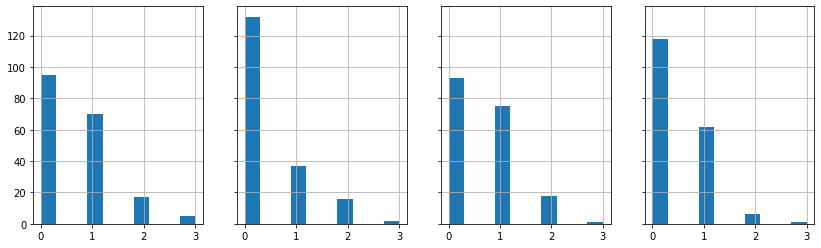

In [41]:
f, axi = plt.subplots(1, 4, sharey=True)
f.set_figheight(4); f.set_figwidth(14)

scores.loc[scores.TaskAbb == 'FtnL','Tremor - Left'].hist(ax=axi[0])
scores.loc[scores.TaskAbb == 'FtnR','Tremor - Right'].hist(ax=axi[1])
scores.loc[scores.TaskAbb == 'FtnL','Bradykinesia - Left'].hist(ax=axi[2])
scores.loc[scores.TaskAbb == 'FtnR','Bradykinesia - Right'].hist(ax=axi[3])

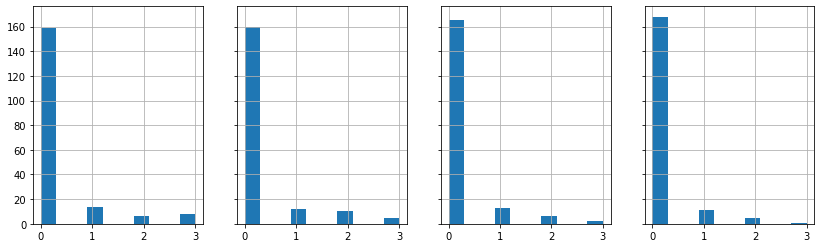

In [56]:
f, axi = plt.subplots(1, 4, sharey=True)
f.set_figheight(4); f.set_figwidth(14)

scores.loc[scores.TaskAbb == 'Sitng','Tremor - Left'].hist(ax=axi[0])
scores.loc[scores.TaskAbb == 'Sitng','Tremor - Right'].hist(ax=axi[1])
scores.loc[scores.TaskAbb == 'SitStand','Tremor - Left'].hist(ax=axi[2]) #Only tremor is assesed with SitStand
scores.loc[scores.TaskAbb == 'SitStand','Tremor - Right'].hist(ax=axi[3])

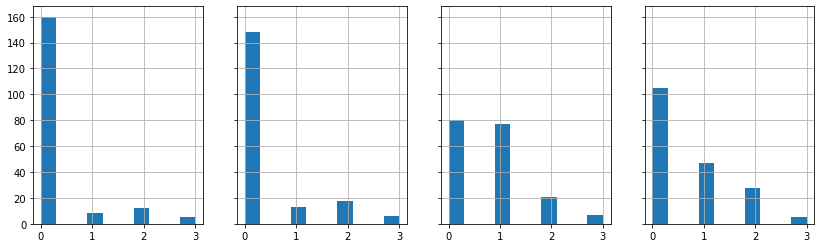

In [57]:
f, axi = plt.subplots(1, 4, sharey=True)
f.set_figheight(4); f.set_figwidth(14)

scores.loc[scores.TaskAbb == 'WlkgCnt','Tremor - Left'].hist(ax=axi[0])
scores.loc[scores.TaskAbb == 'WlkgCnt','Tremor - Right'].hist(ax=axi[1])
scores.loc[scores.TaskAbb == 'WlkgCnt','Bradykinesia - Left'].hist(ax=axi[2]) 
scores.loc[scores.TaskAbb == 'WlkgCnt','Bradykinesia - Right'].hist(ax=axi[3])

In [58]:
scores[['TaskAbb','Dyskinesia - Left']].groupby(['TaskAbb']).agg(['mean','max','min','median'])
# scores[['TaskAbb','Dyskinesia - Right']].groupby(['TaskAbb']).agg(['mean','max','min','median'])
# scores[['TaskAbb','Tremor - Left']].groupby(['TaskAbb']).agg(['mean','max','min','median'])
# scores[['TaskAbb','Bradykinesia - Left']].groupby(['TaskAbb']).agg(['mean','max','min','median'])


Dyskinesia - Left                 
                      mean  max  min median
TaskAbb                                    
Drnkg             0.080214  2.0  0.0    0.0
Drwg              0.032086  1.0  0.0    0.0
Fldg              0.053476  2.0  0.0    0.0
FtnL              0.005348  1.0  0.0    0.0
FtnR              0.090909  1.0  0.0    0.0
NtsBts            0.101604  2.0  0.0    0.0
RamL              0.069519  2.0  0.0    0.0
RamR              0.106952  2.0  0.0    0.0
Sheets            0.048128  2.0  0.0    0.0
SitStand          0.102151  2.0  0.0    0.0
Sitng             0.133690  2.0  0.0    0.0
Stndg             0.192513  2.0  0.0    0.0
Typg              0.128342  3.0  0.0    0.0
Wlkg              0.263441  3.0  0.0    0.0
WlkgCnt           0.351351  3.0  0.0    0.0

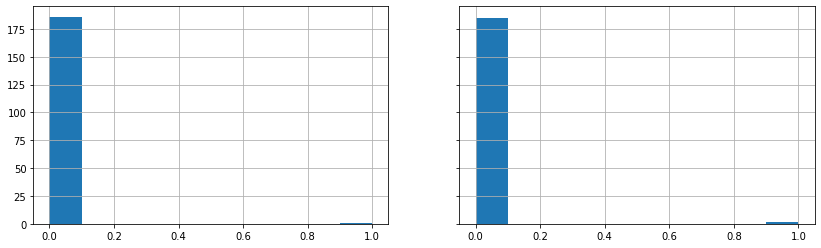

In [42]:
f, axi = plt.subplots(1, 2, sharey=True)
f.set_figheight(4); f.set_figwidth(14)
scores.loc[scores.TaskAbb == 'FtnL','Dyskinesia - Left'].hist(ax=axi[0])
scores.loc[scores.TaskAbb == 'FtnR','Dyskinesia - Right'].hist(ax=axi[1])

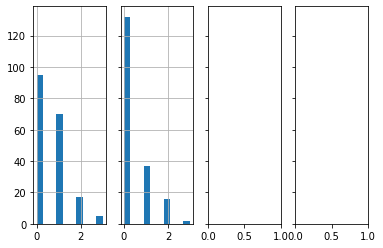

In [34]:
f.se

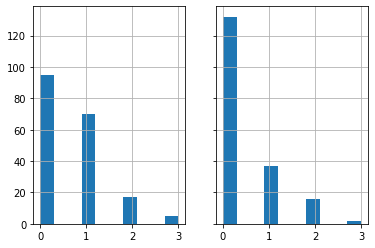

In [30]:
f, (ax1,ax2) = plt.subplots(1, 2, sharey=True)
scores.loc[scores.TaskAbb == 'RamL','Tremor - Left'].hist(ax=ax1)
scores.loc[scores.TaskAbb == 'RamR','Tremor - Right'].hist(ax=ax2)